In [92]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'

savefigs = True

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [2]:
with open(DATAFOLDER / "x_array_2clusters_alltrials.pickle", "rb") as f:
    x_array = dill.load(f)

In [3]:
x_array

,trial,id,condition,infusiontype,cluster
0,0,PB23,deplete,10NaCl,0
1,1,PB23,deplete,10NaCl,0
2,2,PB23,deplete,10NaCl,0
3,3,PB23,deplete,10NaCl,1
4,4,PB23,deplete,10NaCl,0
...,...,...,...,...,...
1962,44,PB75,replete,45NaCl,1
1963,45,PB75,replete,45NaCl,1
1964,46,PB75,replete,45NaCl,1
1965,47,PB75,replete,45NaCl,1


In [4]:
with open(DATAFOLDER / "snips_data_selected_conditions.pickle", "rb") as f:
    data = dill.load(f)

snips_10NaCl = data["snips_10NaCl_selected"]
snips_45NaCl = data["snips_45NaCl_selected"]

snips_all = np.vstack([snips_10NaCl, snips_45NaCl])
snips_all.shape

(1967, 200)

Cluster 1: n=668, Chi-squared p-value: 0.0000
Cluster 2: n=1299, Chi-squared p-value: 0.0000


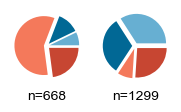

In [93]:
# order for data is rep_10, rep_45, dep_10, dep_45
 
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

f, ax = plt.subplots(ncols=len(x_array.cluster.unique()), figsize=(1.8, 1.2),
                     gridspec_kw={'left': 0.05, 'right': 0.95}
                     )

all_clusters_observed_counts = []

for cluster in np.arange(0,2):
    tmp = x_array.query("cluster == @cluster")# .groupby(["condition", "infusiontype"]).count().cluster
    total = len(tmp)
    
    observed_counts = [
        len(tmp.query("condition == 'replete' & infusiontype == '10NaCl'")),
        len(tmp.query("condition == 'replete' & infusiontype == '45NaCl'")),
        len(tmp.query("condition == 'deplete' & infusiontype == '10NaCl'")),
        len(tmp.query("condition == 'deplete' & infusiontype == '45NaCl'"))
    ]
    all_clusters_observed_counts.append(observed_counts) # Add to list for overall test
    
    pie_props = [count / total if total > 0 else 0 for count in observed_counts]
    
    if total > 0:
        expected_counts = [total / 4, total / 4, total / 4, total / 4]
        
        # Perform Chi-squared goodness-of-fit test
        chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
        print(f"Cluster {cluster+1}: n={total}, Chi-squared p-value: {p_value:.4f}")
        
        # You can add an asterisk or other marker to the plot if p_value is significant
        significance_marker = "*" if p_value < 0.05 else ""
    else:
        print(f"Cluster {cluster+1}: n={total}, skipping Chi-squared test (empty cluster)")
        significance_marker = ""
        p_value = 1.0 # or np.nan
    
    ax[cluster].pie(pie_props,
              colors=colors,
              explode=(0.1, 0.1, 0.1, 0.1),
              #autopct='%1.1f%%'
              )
    
    ax[cluster].text(0,-1.7, f"n={total}", ha="center", va="center", fontsize=10, color="k")

if savefigs:
    f.savefig(FIGSFOLDER / "pies_clusters_all.pdf", dpi=600, transparent=True)


In [94]:
# Perform overall Chi-squared test for independence across all clusters
contingency_table = np.array(all_clusters_observed_counts)
np.savetxt(RESULTSFOLDER / "cluster_contingency_table.csv", contingency_table, delimiter=",", fmt='%d') # fmt='%d' for integers


# Check if the contingency table has valid data for the test
if contingency_table.sum() > 0 and not (np.any(contingency_table.sum(axis=1) == 0) or np.any(contingency_table.sum(axis=0) == 0)):
    chi2_overall, p_overall, dof_overall, expected_freq_overall = stats.chi2_contingency(contingency_table)
    print("\nOverall Chi-squared Test for Independence (Clusters vs. Conditions):")
    print(f"Chi2 Statistic: {chi2_overall:.4f}")
    print(f"P-value: {p_overall:.4f}")
    print(f"Degrees of Freedom: {dof_overall}")
    # print("Expected Frequencies Table:\n", expected_freq_overall)
else:
    print("\nOverall Chi-squared Test for Independence could not be performed due to zero sums in rows/columns or empty table.")


Overall Chi-squared Test for Independence (Clusters vs. Conditions):
Chi2 Statistic: 631.9276
P-value: 0.0000
Degrees of Freedom: 3


In [95]:
len(x_array)

1967

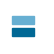

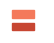

In [69]:
from matplotlib.patches import Rectangle, Patch

f, ax = plt.subplots(figsize=(0.35, 0.45), gridspec_kw={'left': 0.01, 'right': 0.99}
                    )
# for ref: groups = ["10NaCl replete", "45NaCl replete", "10NaCl deplete", "45NaCl deplete"]

groups = ["", ""]

legend_patches = []
for color, text in zip(colors[:2], groups):
    patch = Patch(color=color, label=text)  # Create a patch for the legend
    legend_patches.append(patch)

ax.legend(handles=legend_patches, loc='center', fontsize=8, frameon=False,
          # bbox_to_anchor=(0.5, 0.5),
          # handletextpad=0.5,
          labelspacing=0.2,
          borderpad=0.05)
ax.axis('off')

if savefigs:
    f.savefig(FIGSFOLDER / "legend_pies_replete.pdf", dpi=600, transparent=True)

f, ax = plt.subplots(figsize=(0.35, 0.25), gridspec_kw={'left': 0.01, 'right': 0.99}                     )

legend_patches = []
for color, text in zip(colors[2:], groups):
    patch = Patch(color=color, label=text)  # Create a patch for the legend
    legend_patches.append(patch)

ax.legend(handles=legend_patches, loc='center', fontsize=8, frameon=False,
          # bbox_to_anchor=(0.5, 0.5),
          # handletextpad=0.5,
          labelspacing=0.2,
          borderpad=0.05)
ax.axis('off')

if savefigs:
    f.savefig(FIGSFOLDER / "legend_pies_deplete.pdf", dpi=600, transparent=True)

Cluster 0
(668, 200)
Cluster 1
(1299, 200)


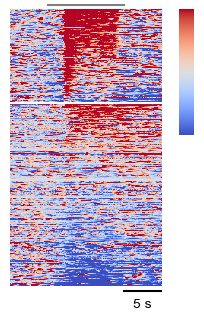

In [ ]:
# plot heatmap of all trials sorted first by cluster, then by strength of response using
# sortresponse = np.argsort(np.mean(temp[:,sortwindow[0]:sortwindow[1]], axis=1))[::-1]
# or similar

savefigs=True

list_of_clustered_snips = []
n_of_clusters = []

for cluster in np.arange(0,2):
    print("Cluster", cluster)
    tmp = snips_all[x_array.cluster == cluster, :]
    sort_order = np.argsort(np.mean(tmp[:,50:150], axis=1))[::-1]
    snips_cluster = tmp[sort_order, :]

    print(snips_cluster.shape)

    snips_cluster.shape
    list_of_clustered_snips.append(snips_cluster)
    n_of_clusters.append(snips_cluster.shape[0])
    
clustered_snips = np.vstack(list_of_clustered_snips)

layout = [["ax", "cbar_ax"],
          ["ax", "empty"]]

f, ax = plt.subplot_mosaic(layout, figsize=(2.3, 3.6), gridspec_kw={'left': 0.1, 'right': 0.9, 'width_ratios': [10, 1], 'wspace': 0.2})  # Adjust width_ratios for colorbar width

cbar_ax = ax["cbar_ax"]
ax["empty"].remove()

ax = ax["ax"]

sns.heatmap(clustered_snips, ax=ax, vmin=-1, vmax=1, cmap="coolwarm", cbar_ax=cbar_ax)
ax.set_yticks([])
ax.set_xticks([])

for c in np.cumsum(n_of_clusters)[:-1]:
    ax.axhline(c, color="white")


ax.plot([150, 198], [2000, 2000], color="k", linewidth=1.5, clip_on=False)
ax.text(174, 2050, "5 s", ha="center", va="top")

ax.plot([50, 150], [-30, -30], color="k", alpha=0.5, linewidth=1.5, clip_on=False)

cbar_ax.set_yticks([])

if savefigs:
    # f.savefig(FIGSFOLDER / "clusters_heatmap_all.pdf", transparent=True)
    f.savefig(FIGSFOLDER / "clusters_heatmap_all.tif",  dpi=300, transparent=True)
    

In [9]:
len(x_array)

1967

In [17]:
df = x_array

def get_prop_of_cluster(df, cluster, condition, infusiontype):
    df_temp = (df
               .query("condition == @condition & infusiontype == @infusiontype")
               )
               
    prop_by_trial = []

    for trial in df_temp.trial.unique():
        n = len(df_temp.query("trial == @trial"))
        n_cluster = len(df_temp.query("trial == @trial & cluster == @cluster"))
        prop_by_trial.append(n_cluster / n)
    
    return prop_by_trial

p = get_prop_of_cluster(df, 0, "replete", "45NaCl")

Cluster 0
Cluster 1


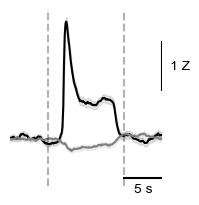

In [67]:
# make line plot with shaded error of cluster 1 and 2

colors = ["#6FA287", "blue"]
colors = ["black", "grey"]


f, [ax, empty] = plt.subplots(ncols=2, figsize=(2.3, 2.3), gridspec_kw={'left': 0.1, 'right': 0.9, 'width_ratios': [10, 1], 'wspace': 0.2})  # Adjust width_ratios for colorbar width

empty.remove()

for cluster, color in zip(np.arange(0,2), colors):
    print("Cluster", cluster)
    snips_cluster = snips_all[x_array.cluster == cluster, :]
    x = np.arange(snips_cluster.shape[1]) / 10
    mean = np.mean(snips_cluster, axis=0)
    sd = np.std(snips_cluster, axis=0)
    sem = sd / np.sqrt(snips_cluster.shape[0])
    ci = sem * 1.96
    
    ax.plot(x, np.mean(snips_cluster, axis=0), color=color, lw=1.5)
    ax.fill_between(x, mean-ci, mean+ci, alpha=0.1, color=color)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 20)
ax.axvline(5, color="k", linestyle="--", alpha=0.3)
ax.axvline(15, color="k", linestyle="--", alpha=0.3)
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
    

ax.plot([20, 20], [1, 2], color="k")
ax.text(21, 1.5, "1 Z", ha="left", va="center", fontsize=10)

ax.plot([15, 20], [-0.8, -0.8], color="k")
ax.text(17.5, -0.9, "5 s", ha="center", va="top", fontsize=10)

if savefigs:
    f.savefig(FIGSFOLDER / "snips_2clusters_all.pdf", dpi=600, transparent=True)



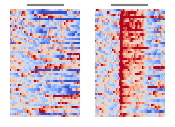

In [37]:
vlim = 2

f, ax = plt.subplots(ncols=2, figsize=(2, 1.4))

id = "PB39"
replete_data = snips_all[(x_array.id == id) & (x_array.condition == "replete"), :] 
deplete_data = snips_all[(x_array.id == id) & (x_array.condition == "deplete"), :]

sns.heatmap(data=replete_data, vmin=-vlim, vmax=vlim, ax=ax[0], cmap="coolwarm", cbar=False)
sns.heatmap(data=deplete_data, vmin=-vlim, vmax=vlim, ax=ax[1], cmap="coolwarm", cbar=False)

for axis in ax:
    axis.set_yticks([])
    axis.set_xticks([])
    axis.plot([50,150], [-2, -2], color="k", alpha=0.5, linewidth=1.5, clip_on=False)

if savefigs:
    f.savefig(FIGSFOLDER / "rep_heatmaps_10_all.pdf", transparent=True)




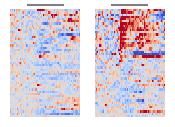

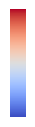

In [38]:
vlim = 2

f, ax = plt.subplots(ncols=2, figsize=(2, 1.4))
f2, cbar_ax = plt.subplots(figsize=(0.2, 1.4))

id = "PB73"
replete_data = snips_all[(x_array.id == id) & (x_array.condition == "replete"), :] 
deplete_data = snips_all[(x_array.id == id) & (x_array.condition == "deplete"), :]

sns.heatmap(data=replete_data, vmin=-vlim, vmax=vlim, ax=ax[0], cmap="coolwarm", cbar=True, cbar_ax=cbar_ax)
sns.heatmap(data=deplete_data, vmin=-vlim, vmax=vlim, ax=ax[1], cmap="coolwarm", cbar=False)

for axis in ax:
    axis.set_yticks([])
    axis.set_xticks([])
    axis.plot([50,150], [-2, -2], color="k", alpha=0.5, linewidth=1.5, clip_on=False)

cbar_ax.set_yticks([])

if savefigs:
    f.savefig(FIGSFOLDER / "rep_heatmaps_45_all.pdf", transparent=True)
    f2.savefig(FIGSFOLDER / "rep_heatmaps_45_cbar_all.pdf", transparent=True)

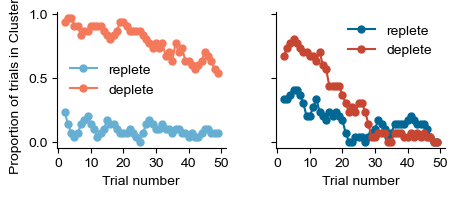

In [30]:
df = x_array

f, ax = plt.subplots(ncols=2, figsize=(5, 2), sharey=True,
                     gridspec_kw={'wspace': 0.3, "bottom": 0.2}
                     )

cluster=0
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

infusiontype = "10NaCl"
for condition, color in zip(["replete", "deplete"], [colors[0], colors[2]]):
        prop_by_trial = get_prop_of_cluster(df, cluster, condition, infusiontype)
        df_to_plot = pd.DataFrame({"prop": prop_by_trial})
        df_to_plot.rolling = df_to_plot.prop.rolling(window=3).mean()
        ax[0].plot(df_to_plot
                   .rolling
                   , label=condition,
                   marker="o",
                   markersize=5,
                   color=color)
        
infusiontype = "45NaCl"
for condition, color in zip(["replete", "deplete"], [colors[1], colors[3]]):
        prop_by_trial = get_prop_of_cluster(df, cluster, condition, infusiontype)
        df_to_plot = pd.DataFrame({"prop": prop_by_trial})
        df_to_plot.rolling = df_to_plot.prop.rolling(window=3).mean()
        ax[1].plot(df_to_plot
                   .rolling
                   , label=condition,
                   marker="o",
                   markersize=5,
                   color=color)


ax[0].set_ylabel("Proportion of trials in Cluster 1")

for axis in ax:
        axis.set_xlabel("Trial number")
        sns.despine(ax=axis)
        axis.set_xticks(np.arange(0, 51, 10),
                        # labels=["0", "8", "16", "24", "32", "40"]
                        )
        axis.set_yticks([0, 0.5, 1])
        axis.legend(frameon=False)
        
if savefigs:
        f.savefig(FIGSFOLDER / "cluster_1_prop_all.pdf", dpi=600, transparent=True)

In [75]:
# Question 1 from Mitch/Alex - probability of transitions between clusters

all_transitions = []
for rat in x_array.id.unique():
    for condition in ["replete", "deplete"]:
        x_array_r = x_array.query("id == @rat & condition == @condition")
        transition_matrix = np.zeros((2,2))
        for i in range(len(x_array_r)-1):
            current_cluster = x_array_r.iloc[i].cluster
            next_cluster = x_array_r.iloc[i+1].cluster
            transition_matrix[current_cluster, next_cluster] += 1
        
        all_transitions.append(transition_matrix)

[[0.73 0.27]
 [0.13 0.87]]


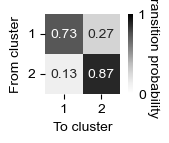

In [91]:
all_transitions = np.array(all_transitions)
all_transitions_mean = np.mean(all_transitions, axis=0)

all_transitions_mean = all_transitions_mean / np.sum(all_transitions_mean, axis=1, keepdims=True)
all_transitions_mean = np.nan_to_num(all_transitions_mean, nan=0.0)
all_transitions_mean = np.clip(all_transitions_mean, 0, 1)
all_transitions_mean = all_transitions_mean.round(2)

print(all_transitions_mean)
f = plt.figure(figsize=(1.6,1.6))
gs = f.add_gridspec(1, 2, width_ratios=[15, 1],
                    left=0.25, bottom=0.3, right=0.8, top=0.8)  # Adjust width_ratios for colorbar width

ax = f.add_subplot(gs[0])
cbar_ax = f.add_subplot(gs[1])

sns.heatmap(all_transitions_mean,
            cmap="Greys",
            vmin=0, vmax=1,
            annot=True,
            ax=ax, cbar_ax=cbar_ax,
            cbar_kws={"orientation": "vertical"},
            # linewidths=0.5, linecolor="black", annot_kws={"size": 8}, fmt=".2f"
)
ax.set_ylabel("From cluster")
ax.set_xlabel("To cluster")

ax.set_yticks(np.arange(2)+0.5, labels=np.arange(1,3), rotation=0)
ax.set_xticks(np.arange(2)+0.5, labels=np.arange(1,3))

cbar_ax.set_yticks([0, 1])
cbar_ax.set_ylabel("Transition probability", rotation=-90, labelpad=10, fontsize=10)
cbar_ax.tick_params(axis='both', which='both', length=0)

if savefigs:
        f.savefig(FIGSFOLDER / "cluster_transitions_all.pdf", dpi=600, transparent=True)

In [109]:
all_transitions_sum = np.sum(all_transitions, axis=0)

In [112]:
all_transitions_sum


array([[ 482.,  180.],
       [ 165., 1100.]])

In [114]:
all_transitions_sum[0,1]

np.float64(180.0)

In [120]:
from statsmodels.stats.proportion import proportion_confint
all_transitions_sum = np.sum(all_transitions, axis=0)

# Example: Observed transitions
n_A_to_B = all_transitions_sum[0,1]
n_A_total = np.sum(all_transitions_sum, axis=1)[0]
n_B_to_A = all_transitions_sum[1,0]
n_B_total = np.sum(all_transitions_sum, axis=1)[1]

# Added: Observed transitions for staying in the same state
n_A_to_A = all_transitions_sum[0,0]
n_B_to_B = all_transitions_sum[1,1]

# Confidence intervals
ci_A_to_B = proportion_confint(n_A_to_B, n_A_total, alpha=0.05, method='normal')
ci_B_to_A = proportion_confint(n_B_to_A, n_B_total, alpha=0.05, method='normal')

# Added: Confidence intervals for staying in the same state
ci_A_to_A = proportion_confint(n_A_to_A, n_A_total, alpha=0.05, method='normal')
ci_B_to_B = proportion_confint(n_B_to_B, n_B_total, alpha=0.05, method='normal')

print(f"95% CI for P(A -> A): {ci_A_to_A}, {np.sum(ci_A_to_A) / 2:.4f} +/- {np.diff(ci_A_to_A)[0] / 2:.4f}")
print(f"95% CI for P(A -> B): {ci_A_to_B}, {np.sum(ci_A_to_B) / 2:.4f} +/- {np.diff(ci_A_to_B)[0] / 2:.4f}")
print(f"95% CI for P(B -> A): {ci_B_to_A}, {np.sum(ci_B_to_A) / 2:.4f} +/- {np.diff(ci_B_to_A)[0] / 2:.4f}")
print(f"95% CI for P(B -> B): {ci_B_to_B}, {np.sum(ci_B_to_B) / 2:.4f} +/- {np.diff(ci_B_to_B)[0] / 2:.4f}")


95% CI for P(A -> A): (0.6942028286560055, 0.7619905248183149), 0.7281 +/- 0.0339
95% CI for P(A -> B): (0.23800947518168517, 0.30579717134399464), 0.2719 +/- 0.0339
95% CI for P(B -> A): (0.11187595159085073, 0.14899361362654057), 0.1304 +/- 0.0186
95% CI for P(B -> B): (0.8510063863734594, 0.8881240484091493), 0.8696 +/- 0.0186


In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm("cluster ~ trial * C(condition) * C(infusiontype)",
                              data=x_array,
                              #groups="id", # Specifies the random effects grouping
                              family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                cluster   No. Observations:                 1967
Model:                            GLM   Df Residuals:                     1959
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -812.42
Date:                Thu, 15 May 2025   Deviance:                       1624.8
Time:                        14:35:08   Pearson chi2:                 2.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3659
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [124]:
df = x_array.query("condition == 'replete'")

model = smf.glm("cluster ~ trial * C(infusiontype)",
                              data=df,
                              #groups="id", # Specifies the random effects grouping
                              family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                cluster   No. Observations:                  982
Model:                            GLM   Df Residuals:                      978
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -360.77
Date:                Thu, 15 May 2025   Deviance:                       721.54
Time:                        14:37:29   Pearson chi2:                 1.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03856
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [125]:
df = x_array.query("condition == 'deplete'")

model = smf.glm("cluster ~ trial * C(infusiontype)",
                              data=df,
                              #groups="id", # Specifies the random effects grouping
                              family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                cluster   No. Observations:                  985
Model:                            GLM   Df Residuals:                      981
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.65
Date:                Thu, 15 May 2025   Deviance:                       903.30
Time:                        14:40:57   Pearson chi2:                     996.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
x_array.queryid

0       PB23
1       PB23
2       PB23
3       PB23
4       PB23
        ... 
1962    PB75
1963    PB75
1964    PB75
1965    PB75
1966    PB75
Name: id, Length: 1967, dtype: object

In [135]:


x_array.query("condition == 'deplete' & infusiontype == '45NaCl'").id.unique()

array(['PB26', 'PB27', 'PB30', 'PB31', 'PB46', 'PB48', 'PB71', 'PB72',
       'PB73', 'PB75'], dtype=object)

Fitted parameters: [0.91372993 8.90044728 0.23285637]


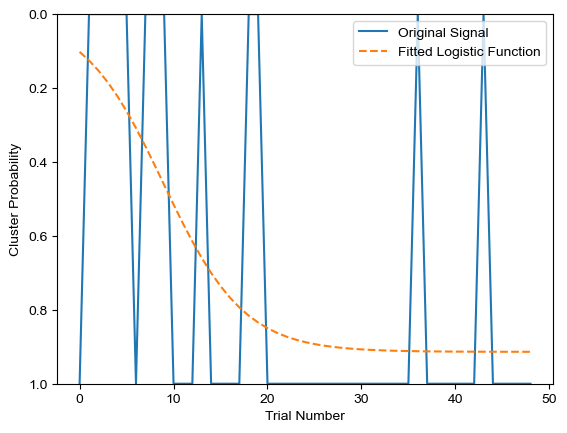

In [147]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example signal with smooth transitions
x = np.linspace(0, 10, 100)
signal = 1 / (1 + np.exp(-(x - 5)))  # Logistic function

signal = x_array.query("condition == 'deplete' & infusiontype == '45NaCl' & id == 'PB46'").cluster
x = np.arange(len(signal))

# Define logistic function
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Fit logistic function to the signal
popt, _ = curve_fit(logistic, x, signal, p0=[1, 5, 1])  # Initial guesses for L, x0, k

# Plot the signal and the fitted function
f, ax = plt.subplots()
ax.plot(x, signal, label="Original Signal")
ax.plot(x, logistic(x, *popt), label="Fitted Logistic Function", linestyle="--")
ax.legend()
ax.set_xlabel("Trial Number")
ax.set_ylabel("Cluster Probability")
ax.set_ylim([1,0])

print("Fitted parameters:", popt)

C:\Users\jmc010\AppData\Local\Temp\ipykernel_26480\2879793394.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_26480\2879793394.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_26480\2879793394.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_26480\2879793394.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


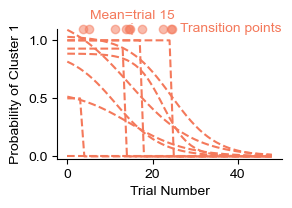

In [180]:
# Define logistic function
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

all_logistic_fits = []

rats = x_array.query("condition == 'deplete' & infusiontype == '45NaCl'").id.unique()

for rat in rats:
    signal = x_array.query("id == @rat & condition == 'deplete' & infusiontype == '45NaCl'").cluster
    
    inverted_signal = np.logical_not(signal).astype(int)
    
    x = np.arange(len(signal))
    
    popt, _ = curve_fit(logistic, x, inverted_signal, p0=[-1, 5, -1])  # Initial guesses for L, x0, k
    
    all_logistic_fits.append(popt)



x = np.arange(len(signal))
     
f, ax = plt.subplots(figsize=(3, 2), gridspec_kw={'left': 0.2, 'right': 0.95, 'top': 0.85, 'bottom': 0.2})

for fit in all_logistic_fits:
    ax.plot(x, logistic(x, *fit), label="Fitted Logistic Function", linestyle="--", color=colors[2])
    
sns.despine(ax=ax)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Probability of Cluster 1")

x0 = np.array(all_logistic_fits)[:,1]

ax.plot(x0, [1.1]*len(x0), marker="o", linestyle="None", color=colors[2], alpha=0.5, clip_on=False)
ax.text(np.max(x0)+2, 1.1, "Transition points", ha="left", va="center", fontsize=10, color=colors[2])

ax.plot([np.mean(x0), np.mean(x0)], [1.05, 1.15], color=colors[2], linestyle="--", alpha=0.5, clip_on=False)
ax.text(np.mean(x0), 1.16, f"Mean=trial {int(np.mean(x0))}", ha="center", va="bottom", fontsize=10, color=colors[2])

ax.set_yticks([0, 0.5, 1])
ax.set_ylim([-0.02, 1.1])

if savefigs:
    f.savefig(FIGSFOLDER / "logistic_fits_45NaCl.pdf", dpi=600, transparent=True)



In [ ]:
L = np.array(all_logistic_fits)[:,0]
x0 = np.array(all_logistic_fits)[:,1]
k = np.array(all_logistic_fits)[:,2]


array([24.49848571,  3.76535223, 24.4345906 , 17.50669272, 11.29790758,
        5.        , 13.66693025, 14.54810395, 22.40239367, 14.62287272])